#### Import packages

In [1]:
import time
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from boruta import BorutaPy
from skopt import BayesSearchCV
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from imblearn.combine import SMOTETomek, SMOTEENN

#### Import data and understand data

In [2]:
def import_dataset(dataset): 
    with open(dataset, 'r', encoding='utf-8') as file:
        raw_data, meta = arff.loadarff(file)

    df = pd.DataFrame(raw_data)
    return df

In [3]:
def missing_values(df):
    # Capture columns with missing data 
    column_na = []
    sum_na = []

    for col in df.columns: 
        col_na_sum = df[col].isna().sum()

        if col_na_sum > 0:
            print(f"{col} [{col_na_sum} missing values]")
            column_na.append(col)
            sum_na.append(col_na_sum)

    if len(sum_na) == 0: 
        print("No columns with missing values")

    else: 
        # Plot msno missing value heatmap
        msno.heatmap(df[column_na])
        plt.title('Missing value heatmap');

def duplicate_records(df): 
    # Identify duplicates
    duplicates = df.duplicated(keep='first').sum()
    print(f"\nNumber of duplicates: {duplicates}")

def data_understanding(df): 
    missing = missing_values(df)
    duplicates = duplicate_records(df)

In [4]:
# Import data 
df_train = import_dataset('Wafer_TRAIN.arff')
df_train.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att144,att145,att146,att147,att148,att149,att150,att151,att152,target
0,-1.602294,-1.670823,-1.693666,-1.699377,-1.699377,-1.703660,-1.703660,-1.703660,-1.703660,-1.703660,...,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,b'1'
1,1.084591,1.084591,1.084591,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.084591,...,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,b'1'
2,0.362689,0.362689,0.362689,0.393316,0.362689,0.362689,0.362689,0.362689,0.362689,0.362689,...,0.393316,0.393316,0.362689,0.393316,0.393316,0.393316,0.393316,0.393316,0.393316,b'1'
3,-1.094523,-1.094523,-1.094523,-1.096732,-1.094523,-1.096732,-1.094523,-1.094523,-1.094523,-1.096732,...,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,b'1'
4,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,...,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,b'1'


In [5]:
data_understanding(df_train)

No columns with missing values

Number of duplicates: 0


In [6]:
# Import data 
df_test = import_dataset('Wafer_TEST.arff')
df_test.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att144,att145,att146,att147,att148,att149,att150,att151,att152,target
0,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,...,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,b'1'
1,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,-1.080197,...,-1.112846,-1.115023,-1.117199,-1.119376,-1.121553,-1.123729,-1.125906,-1.128082,-1.130259,b'1'
2,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,...,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,b'1'
3,-1.658965,-1.696605,-1.705291,-1.711082,-1.711082,-1.715425,-1.715425,-1.715425,-1.715425,-1.715425,...,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,b'1'
4,-1.201221,-1.199042,-1.199042,-1.201221,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,...,-1.183789,-1.181610,-1.179431,-1.177251,-1.175072,-1.172893,-1.170714,-1.168535,-1.166356,b'1'


In [7]:
data_understanding(df_test)

No columns with missing values

Number of duplicates: 0


#### Data cleaning

In [8]:
# Make target variable binary
df_train['target'] = df_train['target'].replace({b'1': 1, b'-1': 0})
df_test['target'] = df_test['target'].replace({b'1': 1, b'-1': 0})

#### Train test validation data split

In [9]:
# Train test val split
X_train = df_train.loc[:, df_train.columns[0:-1]].copy()
y_train = df_train.loc[:, 'target'].copy()

X_test = df_train.loc[:, df_train.columns[0:-1]].copy()
y_test = df_train.loc[:, 'target'].copy()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

#### Model comparison and champion model selection

In [10]:
def boruta_feature_selection(X_train, X_test, y_train, X_val): 
    # Boruta feature selection using random forest 
    rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
    boruta_feature = BorutaPy(rf, n_estimators='auto', random_state=42)

    boruta_feature.fit(X_train.to_numpy(), y_train)

    features_selected = [i for i in X_train.columns[boruta_feature.support_]]

    X_train_selected = X_train.loc[:, features_selected].copy()
    X_test_selected = X_test.loc[:, features_selected].copy()
    X_val_selected = X_val.loc[:, features_selected].copy()
    
    return X_train_selected, X_test_selected, X_val_selected


def perform_feature_selection(X_train, X_test, y_train, X_val, feature_method):
    # Feature selection using Boruta feature selection method 
    if feature_method == "Boruta":
        X_train_fil, X_test_fil, X_val_fil = boruta_feature_selection(X_train, X_test, y_train, X_val)
    
    # No feature selection method
    else:
        X_train_fil = X_train.copy()
        X_test_fil = X_test.copy()
        X_val_fil = X_val.copy()

    return X_train_fil, X_test_fil, X_val_fil

def perform_sampling(X_train_fil, y_train, sampling_method):
    # Target variable oversampling methods
    if sampling_method == "SMOTEENN":
        X_train_s, y_train_s = SMOTEENN(random_state=42).fit_resample(X_train_fil, y_train)
    elif sampling_method == "SMOTETomek":
        X_train_s, y_train_s = SMOTETomek(random_state=42).fit_resample(X_train_fil, y_train)
    else:
        X_train_s, y_train_s = X_train_fil, y_train

    return X_train_s, y_train_s

def train_random_forest(X_train_s, y_train_s, X_test_fil, y_test):
    # Train random forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_s, y_train_s)

    # Evaluate model performance 
    y_pred = rf_model.predict(X_test_fil)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    y_pred_proba = rf_model.predict_proba(X_test_fil)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, auc, rf_model

def best_features(X_train_s, rf_model):
    sfm = SelectFromModel(rf_model, threshold='2*median')
    sfm.fit(X_train_s, y_train_s)
    X_selected = sfm.transform(X_train_s)
    selected_feature_names = [col for col in X_train_s.columns[sfm.get_support()]]
    
    return selected_feature_names

In [11]:
results = []
selected_features_dict = {} 

feature_selection_methods = ["Boruta", "None"]
sampling_techniques = ["SMOTEENN", "SMOTETomek", "None"]

for feature_method in feature_selection_methods:
    for sampling_method in sampling_techniques:
        X_train_fil, X_test_fil, X_val_fil = perform_feature_selection(X_train, X_test, y_train, X_val, feature_method)
        X_train_s, y_train_s = perform_sampling(X_train_fil, y_train, sampling_method)
        
        start_time = time.time()
        accuracy, precision, recall, f1, auc, rf_model = train_random_forest(X_train_s, y_train_s, X_test_fil, y_test)
        end_time = time.time()
        
        y_pred_val = rf_model.predict(X_val_fil)
        accuracy_val = accuracy_score(y_val, y_pred_val)
        precision_val = precision_score(y_val, y_pred_val)
        recall_val = recall_score(y_val, y_pred_val)
        f1_val = f1_score(y_val, y_pred_val)

        y_pred_proba_val = rf_model.predict_proba(X_val_fil)[:, 1]
        auc_val = roc_auc_score(y_val, y_pred_proba_val)
        
        elapsed_time = end_time - start_time
        
        original_features = [col for col in X_train_s.columns]
        selected_features = best_features(X_train_s, rf_model)
        
        selected_features_dict[f"{feature_method} + {sampling_method}"] = selected_features
        
        results.append([feature_method, sampling_method, 
                        accuracy, precision, recall, f1, auc, 
                        accuracy_val, precision_val, recall_val, 
                        f1_val, auc_val, elapsed_time])

results_df = pd.DataFrame(results, columns=["Feature Selection", "Sampling", "Test Accuracy", "Test Precision", 
                                            "Test Recall", "Test F1", "Test AUC", "Valid Accuracy", "Valid Precision", 
                                            "Valid Recall", "Valid F1", "Valid AUC", "Time Taken (s)"])


In [12]:
results_df[["Feature Selection", "Sampling", "Time Taken (s)", "Test Accuracy", "Test Precision", "Test Recall", "Test F1", "Test AUC"]]

,Feature Selection,Sampling,Time Taken (s),Test Accuracy,Test Precision,Test Recall,Test F1,Test AUC
0,Boruta,SMOTEENN,1.146033,0.996,0.996685,0.998893,0.997788,0.999920
1,Boruta,SMOTETomek,1.125173,0.996,0.996685,0.998893,0.997788,0.999863
2,Boruta,None,0.997940,0.993,0.994481,0.997785,0.996130,0.999463
3,None,SMOTEENN,1.288505,0.995,0.996681,0.997785,0.997233,0.999772
4,None,SMOTETomek,1.303313,0.996,0.997785,0.997785,0.997785,0.999892
5,None,None,1.408189,0.992,0.993385,0.997785,0.995580,0.999509


In [13]:
results_df[["Feature Selection", "Sampling",  "Time Taken (s)", "Valid Accuracy", "Valid Precision", "Valid Recall", "Valid F1", "Valid AUC"]]

,Feature Selection,Sampling,Time Taken (s),Valid Accuracy,Valid Precision,Valid Recall,Valid F1,Valid AUC
0,Boruta,SMOTEENN,1.146033,0.9900,0.991620,0.997191,0.994398,0.999649
1,Boruta,SMOTETomek,1.125173,0.9900,0.991620,0.997191,0.994398,0.999298
2,Boruta,None,0.997940,0.9825,0.986072,0.994382,0.990210,0.996999
3,None,SMOTEENN,1.288505,0.9875,0.991597,0.994382,0.992987,0.999010
4,None,SMOTETomek,1.303313,0.9900,0.994382,0.994382,0.994382,0.999394
5,None,None,1.408189,0.9800,0.983333,0.994382,0.988827,0.997510


In [14]:
results_df["Accuracy dif"] = round((results_df["Test Accuracy"] - results_df["Valid Accuracy"])*100, 4)
results_df["Precision dif"] = round((results_df["Test Precision"] - results_df["Valid Precision"])*100, 4)
results_df["Recall dif"] = round((results_df["Test Recall"] - results_df["Valid Recall"])*100, 4)
results_df["F1 dif"] = round((results_df["Test F1"] - results_df["Valid F1"])*100, 4)
results_df["AUC dif"] = round((results_df["Test AUC"] - results_df["Valid AUC"])*100, 4)

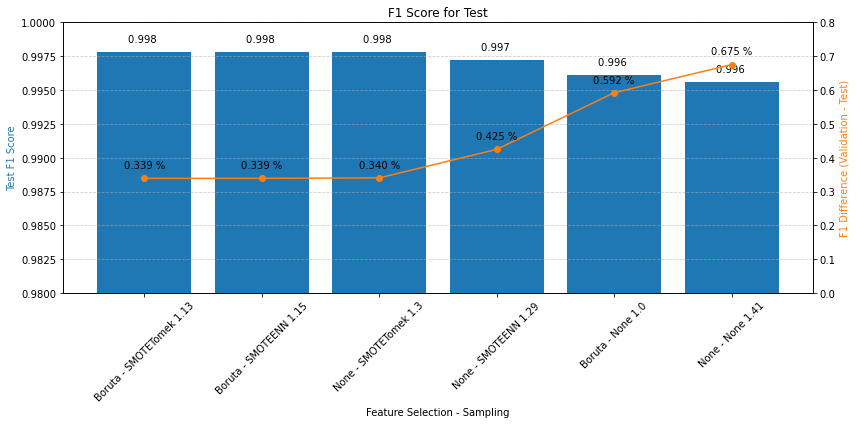

In [15]:
results_df.sort_values(by=["Test F1", "Time Taken (s)"], ascending=[False, True], inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(range(len(results_df)), results_df["Test F1"], color='tab:blue')
ax1.set_xlabel("Feature Selection - Sampling")
ax1.set_ylabel("Test F1 Score", color='tab:blue')
ax1.set_title("F1 Score for Test")
ax1.set_ylim(0.98, 1.0)
ax1.set_xticks(range(len(results_df)))
ax1.set_xticklabels(results_df["Feature Selection"] + " - " + results_df["Sampling"] + " " + round(results_df["Time Taken (s)"], 2).astype("str"), rotation=45)
ax1.grid(axis="y", linestyle="--", alpha=0.6)

ax2 = ax1.twinx()
ax2.plot(results_df["Feature Selection"].to_numpy() + " - " + results_df["Sampling"].to_numpy(), results_df["F1 dif"].to_numpy(), color='tab:orange', marker="o")
ax2.set_ylabel("F1 Difference (Validation - Test)", color='tab:orange')
ax2.set_ylim(0, 0.8)

for i, (test_f1, f1_diff) in enumerate(zip(results_df["Test F1"], results_df["F1 dif"])):
    ax1.annotate(f"{test_f1:.3f} ", (i, test_f1), textcoords="offset points", xytext=(0, 10), ha='center')
    ax2.annotate(f"{f1_diff:.3f} %", (i, f1_diff), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

#### Model optimization

In [16]:
def optimize_random_forest(X_train_s, y_train_s, param_space):
    # Hyperparameter tuning using BayesSearchCV
    model_rf_best_params = RandomForestClassifier()
    opt = BayesSearchCV(model_rf_best_params, param_space, cv=5, random_state=42, n_jobs=-1, scoring='f1')
    opt.fit(X_train_s, y_train_s)
    best_params = opt.best_params_
    
    return best_params

In [17]:
# Boruta feature selection 
X_train_bor, X_test_bor, X_val_bor = boruta_feature_selection(X_train, X_test, y_train, X_val)

# SMOTETomek resampling 
X_train_smt, y_train_smt = SMOTETomek(random_state=42).fit_resample(X_train_bor, y_train)

# Only our training target data would be resampled
X_train_smt_best_feat = X_train_smt[[i for i in selected_features_dict['Boruta + SMOTETomek']]]
X_test_bor_best_feat = X_test_bor[[i for i in selected_features_dict['Boruta + SMOTETomek']]]
X_val_bor_best_feat = X_val_bor[[i for i in selected_features_dict['Boruta + SMOTETomek']]]

print(f"Best features selected: {[i for i in X_train_smt_best_feat.columns]}")

Best features selected: ['att1', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'att30', 'att35', 'att37', 'att38', 'att39', 'att41', 'att46', 'att47', 'att49', 'att111', 'att112', 'att113', 'att114', 'att115', 'att117', 'att118', 'att121', 'att123', 'att136', 'att138', 'att139', 'att140', 'att141', 'att142', 'att143', 'att144', 'att145', 'att146', 'att147', 'att148', 'att149', 'att151']


In [18]:
# Hyperparmeter tuning
param_space = {
    'n_estimators': (10, 100),
    'max_depth': (1, 32),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': (0.1, 1.0),
    'random_state': (0, 100)
}

best_hyperparameters = optimize_random_forest(X_train_smt, y_train_smt, param_space)

print(f"Best Hyperparameters: {best_hyperparameters}")

Best Hyperparameters: OrderedDict([('max_depth', 32), ('max_features', 0.1), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 100), ('random_state', 100)])


In [19]:
# View best hyperparameters
best_hyperparameters_streamlined_feat = optimize_random_forest(X_train_smt_best_feat, y_train_smt, param_space)

print(f"Best Hyperparameters (streamlined features): {best_hyperparameters_streamlined_feat}")

Best Hyperparameters (streamlined features): OrderedDict([('max_depth', 16), ('max_features', 0.1), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 100), ('random_state', 100)])


#### Model comparison and selection

In [20]:
def train_evaluate_rf_model(X_train, y_train, X_test, y_test, X_val, y_val, hyperparameters):
    # Train random forest model with best hyperparameters
    rf_model = RandomForestClassifier(**hyperparameters)
    rf_model.fit(X_train, y_train)

    # Evaluate model
    y_pred_test = rf_model.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test)

    y_pred_val = rf_model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)

    return rf_model, f1_test, f1_val

In [21]:
# Target resampling (SMOTETomek)
rf_model, f1_test, f1_val = train_evaluate_rf_model(X_train_smt, y_train_smt, X_test_bor, y_test, X_val_bor, y_val, best_hyperparameters)
print(f"F1 Score on Test Set: {f1_test:.4f}\nF1 Score on Validation Set: {f1_val:.4f}\nPercentage diff: {(f1_test-f1_val)*100:.3f}%")

F1 Score on Test Set: 0.9978
F1 Score on Validation Set: 0.9944
Percentage diff: 0.339%


In [22]:
# Target resampling (SMOTETomek) + Boruta feature selection
rf_model_best_feat, f1_test_best_feat, f1_val_best_feat = train_evaluate_rf_model(X_train_smt_best_feat, y_train_smt, X_test_bor_best_feat, y_test, X_val_bor_best_feat, y_val, best_hyperparameters_streamlined_feat)
print(f"F1 Score on Test Set: {f1_test_best_feat:.4f}\nF1 Score on Validation Set: {f1_val_best_feat:.4f}\nPercentage diff: {(f1_test_best_feat-f1_val_best_feat)*100:.3f}%")

F1 Score on Test Set: 0.9961
F1 Score on Validation Set: 0.9902
Percentage diff: 0.597%


#### Export model

In [23]:
# Export champion model as pickle file 
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model_best_feat, model_file)